In [1]:
!ls ../mimiciii/MIMICIII_dataset/

ADMISSIONS.csv		   D_ICD_DIAGNOSES.csv	   NOTEEVENTS.csv
CALLOUT.csv		   D_ICD_PROCEDURES.csv    OUTPUTEVENTS.csv
CAREGIVERS.csv		   D_ITEMS.csv		   PATIENTS.csv
CHARTEVENTS.csv		   D_LABITEMS.csv	   PRESCRIPTIONS.csv
checksum_md5_unzipped.txt  DRGCODES.csv		   PROCEDUREEVENTS_MV.csv
checksum_md5_zipped.txt    ICUSTAYS.csv		   PROCEDURES_ICD.csv
CPTEVENTS.csv		   INPUTEVENTS_CV.csv	   SERVICES.csv
DATETIMEEVENTS.csv	   INPUTEVENTS_MV.csv	   TRANSFERS.csv
D_CPT.csv		   LABEVENTS.csv
DIAGNOSES_ICD.csv	   MICROBIOLOGYEVENTS.csv


In [2]:
import pandas as pd
import matplotlib as plot

In [3]:
adm_df = pd.read_csv("../mimiciii/MIMICIII_dataset/NOTEEVENTS.csv")


/home/nachiket/anaconda3/envs/myenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = adm_df
df.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...


In [5]:
df[df['TEXT'].isnull()]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT


In [6]:
adm_df = pd.read_csv("../mimiciii/MIMICIII_dataset/ADMISSIONS.csv")
adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [7]:
adm_df.shape

(58976, 19)

In [8]:
len(adm_df['HADM_ID'].unique()) == adm_df.shape[0]

True

In [9]:
adm_df.loc[adm_df['SUBJECT_ID']==109]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
118,116,109,183350,2137-11-04 19:36:00,2137-11-21 18:13:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2137-11-04 12:48:00,2137-11-04 19:37:00,HYPERTENSIVE EMERGENCY,0,1
119,117,109,128755,2138-04-16 17:44:00,2138-04-19 16:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2138-04-16 10:55:00,2138-04-16 19:14:00,HTN CRISIS,0,1
120,118,109,164029,2140-01-19 13:25:00,2140-01-21 13:25:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-01-19 10:04:00,2140-01-19 15:01:00,HYPERTENSION,0,1
121,119,109,108375,2140-02-02 02:13:00,2140-02-02 16:25:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-02-01 22:03:00,2140-02-02 03:00:00,HYPERTENSIVE URGENCY,0,1
122,120,109,193281,2140-04-07 19:51:00,2140-05-02 16:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-04-07 14:23:00,2140-04-07 21:09:00,HYPERTENSIVE URGENCY,0,1
123,121,109,175347,2140-05-17 14:27:00,2140-05-20 19:50:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-05-17 05:52:00,2140-05-17 15:14:00,HYPERTENSIVE URGENCY,0,1
124,122,109,110668,2140-08-25 14:39:00,2140-09-02 18:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2140-08-25 10:02:00,2140-08-25 15:22:00,HYPERTENSION EMERGENCY,0,1
125,123,109,166018,2141-03-27 21:08:00,2141-03-28 17:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-03-27 17:31:00,2141-03-27 22:55:00,HYPERTENSIVE CRISIS,0,1
126,124,109,170149,2141-05-24 14:47:00,2141-06-06 19:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-05-24 10:57:00,2141-05-24 17:49:00,ACUTE RENAL FAILURE,0,1
127,125,109,147469,2141-06-11 10:17:00,2141-06-17 16:29:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-06-11 07:02:00,2141-06-11 11:50:00,HYPERTENSIVE EMERGENCY,0,1


In [10]:
pat_df = pd.read_csv("../mimiciii/MIMICIII_dataset/PATIENTS.csv")

In [14]:
pat_df

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
5,239,255,M,2109-08-05 00:00:00,NaN,NaN,NaN,0
6,240,256,M,2086-07-31 00:00:00,NaN,NaN,NaN,0
7,241,257,F,2031-04-03 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,1
8,242,258,F,2124-09-19 00:00:00,NaN,NaN,NaN,0
9,243,260,F,2105-03-23 00:00:00,NaN,NaN,NaN,0


In [12]:
pat_df.loc[pat_df['SUBJECT_ID']==109]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
321,100,109,F,2117-08-07 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1


In [13]:
diag_df = pd.read_csv("../mimiciii/MIMICIII_dataset/DIAGNOSES_ICD.csv")
diag_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [15]:
df= diag_df['SUBJECT_ID'].value_counts()
df = df.rename_axis('patient_id').reset_index(name='No Of Disesease Diagnoses')
df.head(5)

,patient_id,No Of Disesease Diagnoses
0,109,540
1,55973,362
2,13033,361
3,7809,360
4,11861,359


In [16]:
cc

NameError: name 'cc' is not defined

In [17]:
hd_df=diag_df.loc[:,'SUBJECT_ID':'HADM_ID']['HADM_ID'].value_counts().rename_axis('hadm_id').reset_index(name='no_counts')
hd_df.loc[hd_df['hadm_id']==124657,:]
hd_df.plot.scatter(x='hadm_id',y='no_counts')
hd_df.head(5)

,hadm_id,no_counts
0,127713,39
1,194067,39
2,101813,39
3,113427,39
4,187452,39


In [35]:
df = diag_df.loc[diag_df['HADM_ID'] == 172335]
df.shape

(14, 5)

In [29]:
diag_df.shape

(651047, 5)

In [18]:
note_df = pd.read_csv("../mimiciii/MIMICIII_dataset/NOTEEVENTS.csv")
note_df.head()


/home/nachiket/anaconda3/envs/myenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [23]:
note_df.shape

(2083180, 11)

In [29]:
temp = note_df.loc[note_df['HADM_ID']==172335]
temp.shape
temp

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
13804,14797,109,172335.0,2141-09-24,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2141-9-18**] ...
73157,72706,109,172335.0,2141-09-21,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Pericar...
178507,170207,109,172335.0,2141-09-18,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nRightward axis\nSince previous t...
343260,341513,109,172335.0,2141-09-21,2141-09-21 02:49:00,2141-09-21 02:49:45,Physician,Physician Resident Admission Note,17650.0,NaN,"Chief Complaint: hypotension, altered mental ..."
343261,341514,109,172335.0,2141-09-21,2141-09-21 02:49:00,2141-09-21 02:57:11,Physician,Physician Resident Admission Note,17650.0,NaN,"Chief Complaint: hypotension, altered mental ..."
343499,341696,109,172335.0,2141-09-21,2141-09-21 23:34:00,2141-09-21 23:34:53,Nursing,Nursing Progress Note,16586.0,NaN,Ms [**Known lastname 406**] is a 24 year old w...
343500,341697,109,172335.0,2141-09-21,2141-09-21 23:34:00,2141-09-21 23:35:18,Nursing,Nursing Progress Note,16586.0,NaN,Ms [**Known lastname 406**] is a 24 year old w...
343501,341698,109,172335.0,2141-09-21,2141-09-21 23:34:00,2141-09-21 23:38:32,Nursing,Nursing Progress Note,16586.0,NaN,Ms [**Known lastname 406**] is a 24 year old w...
343953,341675,109,172335.0,2141-09-21,2141-09-21 18:48:00,2141-09-21 18:48:25,Nursing,Nursing Progress Note,19891.0,NaN,Ms [**Known lastname 406**] is a 24 year old w...
343959,341737,109,172335.0,2141-09-22,2141-09-22 04:45:00,2141-09-22 04:45:20,Physician,Physician Resident Progress Note,17302.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...


In [27]:
nf = note_df.loc[:,['SUBJECT_ID','HADM_ID','TEXT']]
nf.shape

(2083180, 3)

In [22]:
mergedf = pd.merge(df3.loc[:,['SUBJECT_ID','HADM_ID','SEQ_NUM','ICD9_CODE']], nf, on=['SUBJECT_ID','HADM_ID'])

NameError: name 'df3' is not defined

In [ ]:
print(mergedf.shape)
print(df3.shape)
print(nf.shape)
#removing duplicates
final_df = mergedf.drop_duplicates()
print(final_df.shape)

In [ ]:
final_df.to_csv('final.csv')

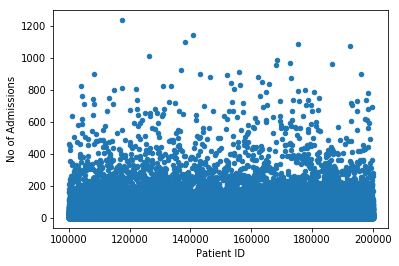

In [31]:
note_df2= note_df['HADM_ID'].value_counts()
note_df2 = note_df2.rename_axis('Patient ID').reset_index(name='No of Admissions')
note_df2.plot.scatter(x='Patient ID',y='No of Admissions')

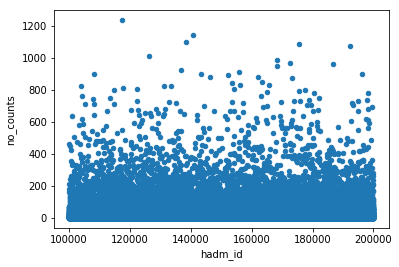

In [7]:
note_df3= note_df['HADM_ID'].value_counts()
note_df3 = note_df3.rename_axis('hadm_id').reset_index(name='no_counts')
note_df3.plot.scatter(x='hadm_id',y='no_counts')

In [12]:
note_df2

,patient_id,no_counts
0,55672,1420
1,78076,1414
2,77614,1351
3,27427,1294
4,109,1279
5,99383,1277
6,30202,1247
7,20082,1094
8,67906,1083
9,6975,1073


In [7]:
df.loc[df['SUBJECT_ID'] == 109]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
11857,14858,109,151240.0,2142-05-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-5-15**] ...
11858,14859,109,102024.0,2142-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-5-20**] ...
11859,14860,109,136572.0,2142-06-20,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-6-18**] ...
11860,14861,109,174489.0,2142-07-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-7-3**] D...
11861,14862,109,131376.0,2142-07-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-7-7**] D...
11862,14863,109,196721.0,2142-07-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-7-12**] ...
11863,14864,109,155726.0,2142-08-16,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-8-13**] ...
11864,14865,109,189332.0,2142-08-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2142-8-28**] ...
13803,14796,109,139061.0,2141-09-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2141-9-11**] ...
13804,14797,109,172335.0,2141-09-24,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2141-9-18**] ...


In [4]:
print(df.iloc[0][10])

Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]


Service:
ADDENDUM:

RADIOLOGIC STUDIES:  Radiologic studies also included a chest
CT, which confirmed cavitary lesions in the left lung apex
consistent with infectious process/tuberculosis.  This also
moderate-sized left pleural effusion.

HEAD CT:  Head CT showed no intracranial hemorrhage or mass
effect, but old infarction consistent with past medical
history.

ABDOMINAL CT:  Abdominal CT showed lesions of
T10 and sacrum most likely secondary to osteoporosis. These can
be followed by repeat imaging as an outpatient.



                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]

Dictated By:[**Hospital 1807**]
MEDQUIST36

D:  [**2151-8-5**]  12:11
T:  [**2151-8-5**]  12:21
JOB#:  [**Job Number 1808**]



In [6]:
print(df.iloc[1][10])

Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]

Date of Birth:                    Sex:  F

Service:  MICU and then to [**Doctor Last Name **] Medicine

HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female
with a history of emphysema (not on home O2), who presents
with three days of shortness of breath thought by her primary
care doctor to be a COPD flare.  Two days prior to admission,
she was started on a prednisone taper and one day prior to
admission she required oxygen at home in order to maintain
oxygen saturation greater than 90%.  She has also been on
levofloxacin and nebulizers, and was not getting better, and
presented to the [**Hospital1 18**] Emergency Room.

In the [**Hospital3 **] Emergency Room, her oxygen saturation was
100% on CPAP.  She was not able to be weaned off of this
despite nebulizer treatment and Solu-Medrol 125 mg IV x2.

Review of systems is negative for the following:  Fevers,
chills, nausea, vomiting, night sweats, change in we

In [7]:
print(df.iloc[2][10])

Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]


Service: CARDIOTHORACIC

Allergies:
Amlodipine

Attending:[**Last Name (NamePattern1) 1561**]
Chief Complaint:
81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]
s/p perc trach [**5-13**]

Major Surgical or Invasive Procedure:
bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]
s/p trachealplasty [**5-5**]
percutaneous tracheostomy [**5-13**] after failed extubation
down size trach on [**5-25**] to size 6 cuffless


History of Present Illness:
This 81 year old woman has a history of COPD. Over the past five

years she has had progressive difficulties with her breathing.
In
[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure
due
to a COPD exacerbation. Due to persistent hypoxemia, she
required
intubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked

narrowing of the airways on expiration consistent with
tracheomalacia.
She subsequently un